In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="style.css">

<h3 style="margin-bottom: 0px;">Riccardo Petri</h3>
<p style="margin-top: 0px;">Matricola 167623</p>
<h2 style="font-size: xxx-large;"><b>Fondamenti Di Scienza Dei Dati<br>E Laboratorio</b></h2>
<div style="padding-top: 5px; font-size: medium;">
    <h3 style="padding-bottom: 0px;">Modulo: <b>Presentazione del progetto</b></h3>
    <h3>Topic: <b style="color: #FFA500;">DJ Mag Top 100 Club: Trend e Cambiamenti</b></h3>
</div>
<p style="padding-top: 35px;">Premi <button>Esc</button> in qualsiasi momento per vedere la mappa di navigazione</p>

<h2>1. Radici del progetto</h2>
<h3>Motivazioni della ricerca</h3>
<ul>
    <li>Interesse verso l'industria dell'intrattenimento notturno 🌒</li>
    <li>Importanza economica e culturale dei club nelle città</li>
    <ul>
        <li><i style="color: #FFA500;">La techno berlinese diventa patrimonio immateriale dell’Unesco (2024)</i></li>
    </ul>
</ul>

<h3 style="padding-top: 10px;">Origine dell'interesse nel settore</h3>
<ul>
    <li>Passione per la musica elettronica e gli eventi dal vivo</li>
    <li>Esperienze dirette frequentando alcuni club di fama mondiale</li>
    <li>Passione per il campo del DJing e della produzione musicale 🎧🎵</li>
</ul>

<h3>Focus dell'analisi 🔍</h3>
<ul>
    <li>Quali elementi contribuiscono al successo di un club?</li>
</ul>

<ul>
    <li>Quali sono le tendenze emergenti nel panorama dei club?</li>
</ul>

<ul>
    <li>Come varia la popolarità dei club in diverse regioni geografiche?</li>
</ul>

<ul>
    <li>Come è evoluta la classifica dei top 100 club dal 2018 al 2024?</li>
</ul>

<h2>2. Descrizione dei dati</h2>
<p>I dati utilizzati provengono dalla classifica realizzata da<br>DJ Magazine dei top 100 club (al mondo) dal 2018 al 2024 🌍</p>
<ul>
    <li>Il dataset contiene informazioni su:</li>
    <ul>
        <li>Posizione in classifica</li>
        <li>Nome del club</li>
        <li>Città e altre metriche rilevanti</li>
    </ul>
</ul>

<ul style="margin-top: 1em;">
    <li>Alcuni dati che sarebbero stati interessanti includono:</li>
    <ul>
        <li>Specifiche demografiche dei frequentatori</li>
        <li>Entrate finanziarie 💰</li>
        <li>Genere musicale principale</li>
    </ul>
</ul>

<h3>Campione parziale del dataset 📊</h3>
<p style="padding-top: 10px; padding-bottom: 10px;">Attenzione! Alcune colonne sono state omesse<br>per motivi di spazio e/o perchè poco utili a livello esemplificativo</p>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_json('datasets/top_clubs_2018_2024_fixed.json')
partial_df = df.drop(['lat', 'lng'], axis=1).head(5)

display(partial_df)

,rank,name,city,country,capacity,arrow,numpos,year
0,1,Green Valley,Camboriú,Brazil,12000,up,2,2018
1,2,Ushuaïa Ibiza,Playa D’en Bossa,Ibiza,5000,up,2,2018
2,3,Zouk Singapore,Singapore,Unknown,2600,up,1,2018
3,4,Echostage,Washington,D.C.,3000,up,4,2018
4,5,Hï Ibiza,Ibiza,Spain,3000,Undefined,new entry,2018


<p>ecc.</p>

<p>L'ultima modifica al <i>dataset</i> risale al 10/06/2024</p>

<h3>Come sono stati ottenuti questi dati <i style="color: #FFA500;">step-by-step</i></h3>
<ul>
    <li>🔍 Analisi della struttura del sito web</li>
    <ul>
        <li>URL: djmag.com/top100clubs/{year}</li>
    </ul>
</ul>

<ul>
    <li>🛠️ Realizzazione di un <i style="color: #FFA500;">web scraper</i></li>
    <ul>
        <li>Raccolta e normalizzazione dei dati in un file JSON</li></li>
    </ul>
</ul>

<ul>
    <li>📝 Normalizzazione manuale</li>
    <ul>
        <li>Aggiustamenti necessari post-raccolta</li>
    </ul>
</ul>

<p style="padding-top:10px;">Il <i>dataset</i> e il <i>codice sorgente</i> del web scraper sono reperibili online sulla pagina GitHub @riccardopetrii</p>

<h2>3. Analisi effettuata</h2>
<h3>Indice</h3>
<ul>
    <li>3.1 ASDASDASD</li>
    <li>3.2 Qual'è il club in tendenza degli ultimi anni? Quale invece ha avuto la maggior regressione?</li>
    <li>3.3 ASDASDASD</li>
    <li>3.4 ASDASDASD</li>
</ul>

<h2>3.1 Club in tendenza 🪩</h2>
<p style="padding-bottom: 0px !important;">Il club in tendenza degli ultimi anni è <i>'Studio 338'</i> con una differenza di 70 posizioni</p>

In [3]:
# find the club that climbed the rankings the most

# if the value is not a number replace it with NaN
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['numpos'] = pd.to_numeric(df['numpos'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# look for clubs with missing values and drop it
df = df.dropna(subset=['rank', 'name', 'year'])

# sort clubs by year, group by name and for each group get the rank of the first avaiable year
initial_positions = df.sort_values(by='year').groupby('name')['rank'].first()

# same but for each group get the rank of the last avaiable year
final_positions = df.sort_values(by='year').groupby('name')['rank'].last()

position_change = initial_positions - final_positions # the value can be negative

max_climb_club = position_change.idxmax() # return index of the maximum value (name)
max_climb_value = position_change.max() # return the maximum value

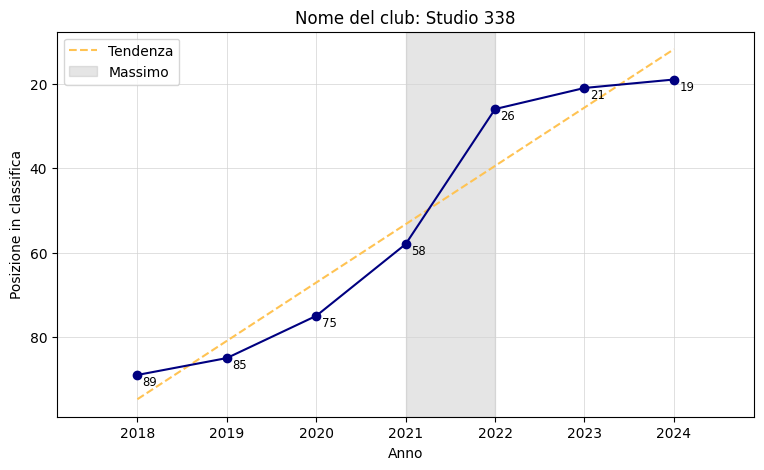

In [4]:
# draw the graph of the club that climbed the rankings the most

max_climb_club_df = df[df['name'] == max_climb_club]

plt.figure(figsize=(9, 5))
plt.margins(0.15, 0.05) # default value 0.05

# trendline
z = np.polyfit(max_climb_club_df['year'], max_climb_club_df['rank'], 1)
p = np.poly1d(z)

plt.plot(max_climb_club_df['year'], p(max_climb_club_df['year']), linestyle='--', color="#ffc353", label='Tendenza')
plt.plot(max_climb_club_df['year'], max_climb_club_df['rank'], marker='o', linestyle='-', color='navy')

for x, y in zip(max_climb_club_df['year'], max_climb_club_df['rank']):
    plt.text(x+.06, y+0.09, y, ha='left', va='top', fontsize='small')

plt.title(f"Nome del club: {max_climb_club}")
plt.xlabel("Anno")
plt.ylabel("Posizione in classifica")
plt.gca().invert_yaxis()
plt.grid(color='lightgray', linewidth = 0.5)

rank_diff = np.abs(np.diff(max_climb_club_df['rank'].to_numpy()))
max_diff_index = np.argmax(rank_diff)

start_year = max_climb_club_df.iloc[max_diff_index]['year']
end_year = max_climb_club_df.iloc[max_diff_index + 1]['year']

plt.axvspan(start_year, end_year, color='gray', alpha=0.2, label="Massimo")

plt.legend()
plt.show()

<h2>Maggior regressione 📉</h2>
<p style="padding-bottom: 0px !important;">Il club con la maggior regressione degli ultimi anni è <i>'EGG LDN'</i> con una differenza di 60 posizioni</p>

In [5]:
# find the club that dropped in the rankings the most

min_climb_club = position_change.idxmin() # return index of the minimum value (name)
min_climb_value = position_change.min() # return the minimum value

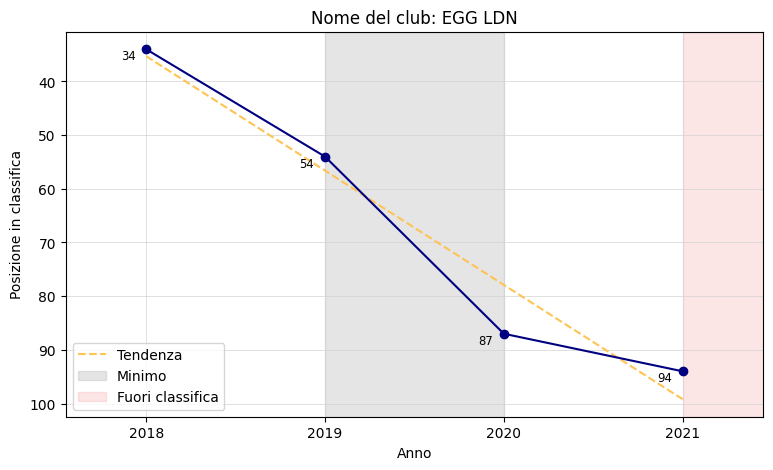

In [6]:
# draw the graph of the club that dropped in the rankings the most

min_climb_club_df = df[df['name'] == min_climb_club]

plt.figure(figsize=(9, 5))
plt.margins(0.15, 0.05) # default value 0.05

# trendline
z = np.polyfit(min_climb_club_df['year'], min_climb_club_df['rank'], 1)
p = np.poly1d(z)

plt.plot(min_climb_club_df['year'], p(min_climb_club_df['year']), linestyle='--', color="#ffc353", label='Tendenza')
plt.plot(min_climb_club_df['year'], min_climb_club_df['rank'], marker='o', linestyle='-', color='navy')

for x, y in zip(min_climb_club_df['year'], min_climb_club_df['rank']):
    plt.text(x-.06, y+.09, y, ha='right', va='top', fontsize='small')

plt.gca().xaxis.set_major_locator(ticker.FixedLocator(min_climb_club_df['year']))

plt.title(f"Nome del club: {min_climb_club}")
plt.xlabel("Anno")
plt.ylabel("Posizione in classifica")
plt.gca().invert_yaxis()
plt.grid(color='lightgray', linewidth = 0.5)

rank_diff = np.abs(np.diff(min_climb_club_df['rank'].to_numpy()))
min_diff_index = np.argmax(rank_diff)

start_year = min_climb_club_df.iloc[min_diff_index]['year']
end_year = min_climb_club_df.iloc[min_diff_index + 1]['year']

plt.axvspan(start_year, end_year, color='gray', alpha=0.2, label="Minimo")
plt.axvspan(2021, 2022, color='lightcoral', alpha=0.2, label="Fuori classifica") # checked

plt.legend()
plt.show()

<h2>3.2 Andamento delle <i>'New entry'</i> e <i>'Re-entry'</i></h2>
<p style="padding-bottom: 0px !important;">L'anno in cui è stato registrato il maggior numero<br>di 'New entry' è il 2020, mentre per i 'Re-entry' è il 2018</p>

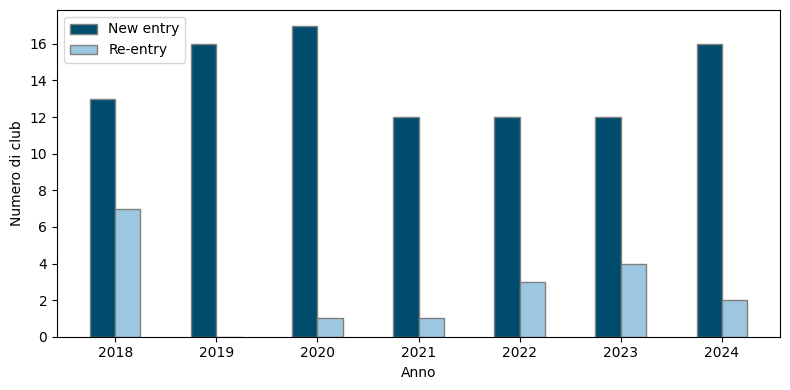

In [7]:
df = pd.read_json('datasets/top_clubs_2018_2024_fixed.json') # temp

new_entries = df[df['numpos'] == 'new entry'].groupby('year').size()
re_entries = df[df['numpos'] == 're-entry'].groupby('year').size()

years = df['year'].unique()
years.sort()

new_entries_counts = [new_entries.get(year, 0) for year in years]
re_entries_counts = [re_entries.get(year, 0) for year in years]

barWidth = 0.25
fig, ax = plt.subplots(figsize =(8, 4))

br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]

plt.bar(br1, new_entries_counts, color ='#004c6d', width = barWidth, edgecolor ='grey', label ='New entry')
plt.bar(br2, re_entries_counts, color ='#9dc6e0', width = barWidth, edgecolor ='grey', label ='Re-entry')

plt.xlabel('Anno')
plt.ylabel('Numero di club')
plt.xticks([r + barWidth/2 for r in range(len(years))], years)

plt.legend()
plt.tight_layout()
plt.show()

<h2>4. Conclusioni e valutazioni finali</h2>
<p>Cosa abbiamo imparato e/o scoperto?</p>
<p>ASDASDASD</p>
<p>ASDASDASD</p>